# Bayesian pooled polling charts

## Set-up

In [1]:
from pathlib import Path
from typing import Any

import matplotlib.pyplot as plt
import pandas as pd
import pymc as pm

In [2]:
# local import
import bayes_tools
import plotting
from common import VOTING_INTENTION
from data_capture import retrieve

In [3]:
MODEL_DIR = "../model-images/"
Path(MODEL_DIR).mkdir(parents=True, exist_ok=True)

plt.style.use("fivethirtyeight")
SHOW = True  # show charts in the notebook
GENERATE_MODEL_MAPS = False

## Get data

In [4]:
data = retrieve()
assert data  # check we got something

## Do the Bayesian pooling ...

In [5]:
def generate_model_map(model: pm.Model, column: str) -> None:
    if GENERATE_MODEL_MAPS:
        gv = pm.model_to_graphviz(model)
        gv.render(
            format="png", 
            filename=f"{MODEL_DIR}model-graphviz-{column.replace('/', '')}"
        )
        display(gv)    

In [6]:
df = plotting.amalgamate_other(data[VOTING_INTENTION])
frame = ("2pp", "Primary vote")
columns = sorted([x for x in df.columns if any(item in x for item in frame)])
to_chart = ("ALP", "L/NP", "GRN", "Other")
chart = [c for c in columns if any(item in c for item in to_chart)]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (10 chains in 10 jobs)
NUTS: [voting_intention, house_effects]


Sampling 10 chains for 1_000 tune and 1_000 draw iterations (10_000 + 10_000 draws total) took 46 seconds.


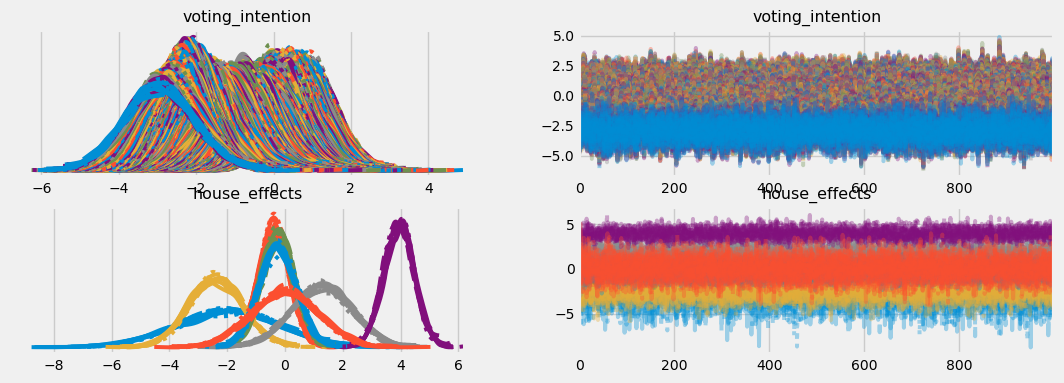

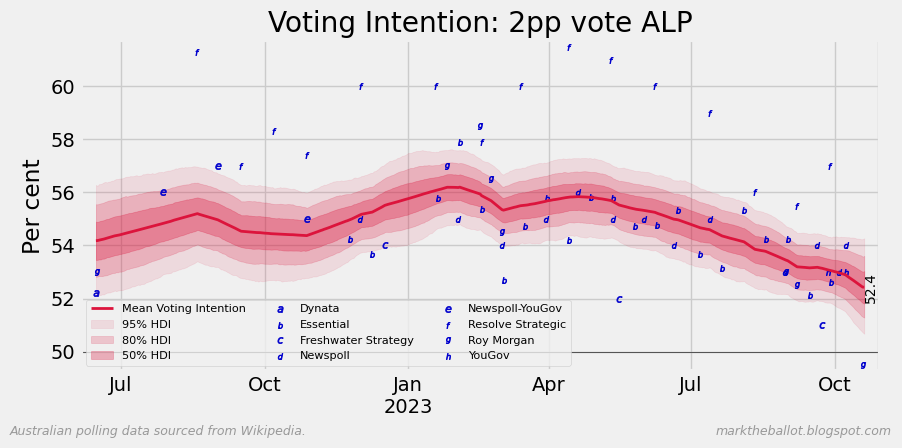

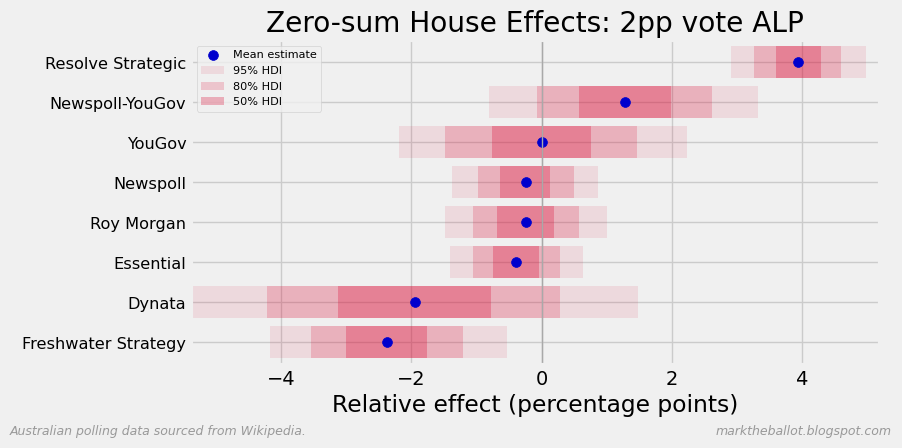

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (10 chains in 10 jobs)
NUTS: [voting_intention, house_effects]


Sampling 10 chains for 1_000 tune and 1_000 draw iterations (10_000 + 10_000 draws total) took 46 seconds.


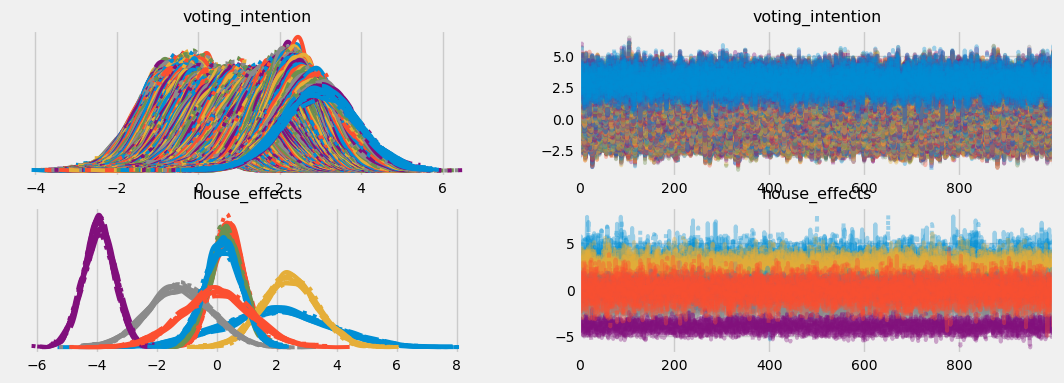

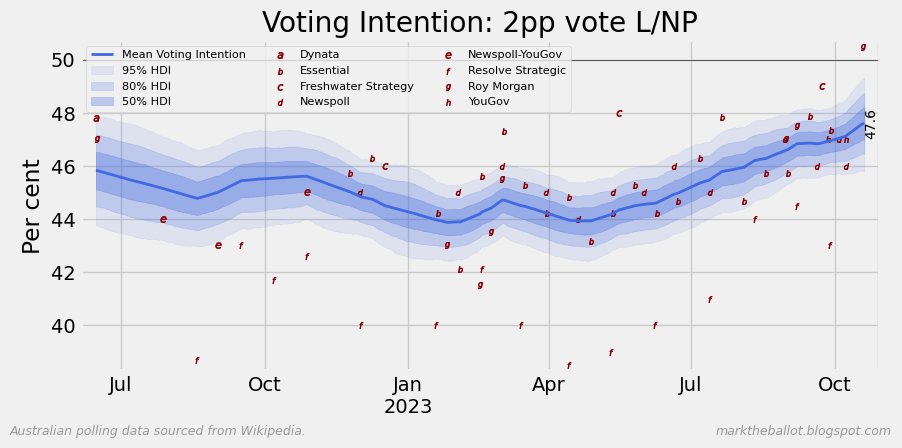

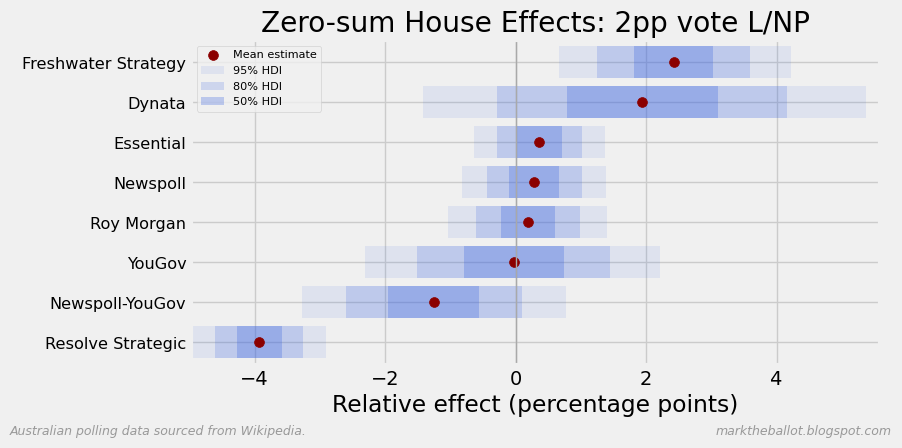

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (10 chains in 10 jobs)
NUTS: [voting_intention, house_effects]


Sampling 10 chains for 1_000 tune and 1_000 draw iterations (10_000 + 10_000 draws total) took 48 seconds.


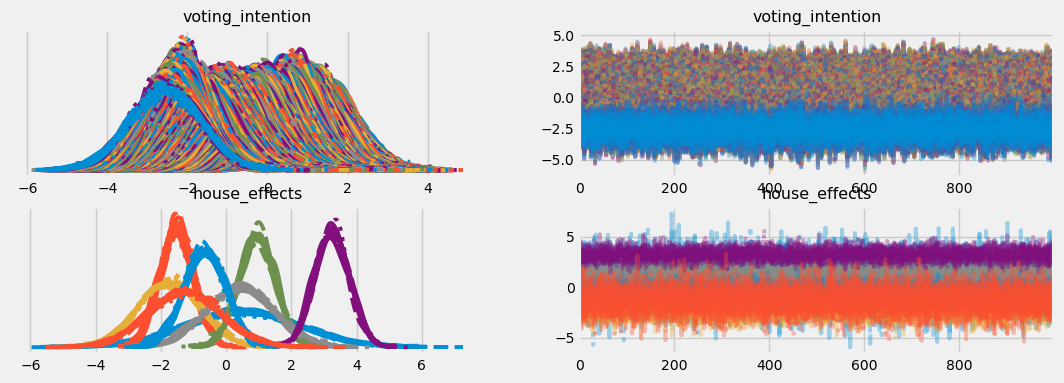

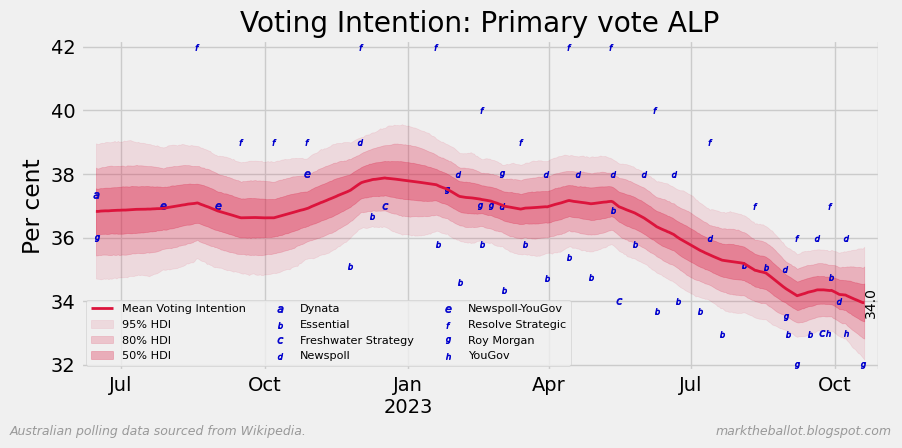

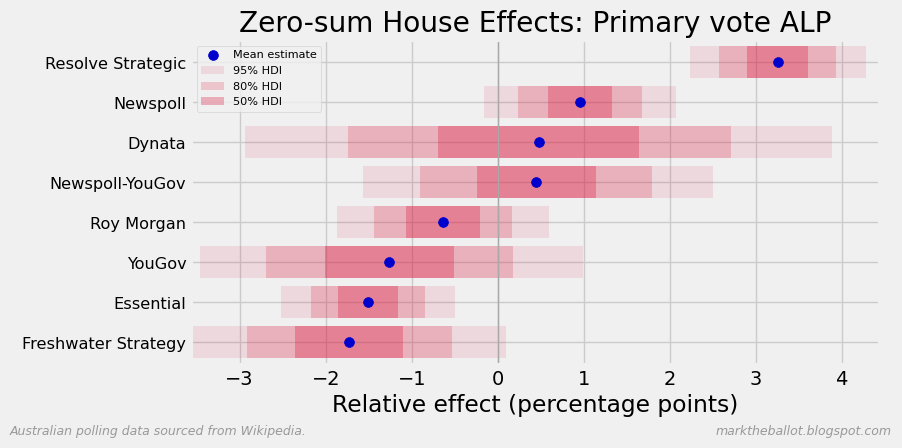

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (10 chains in 10 jobs)
NUTS: [voting_intention, house_effects]


Sampling 10 chains for 1_000 tune and 1_000 draw iterations (10_000 + 10_000 draws total) took 47 seconds.


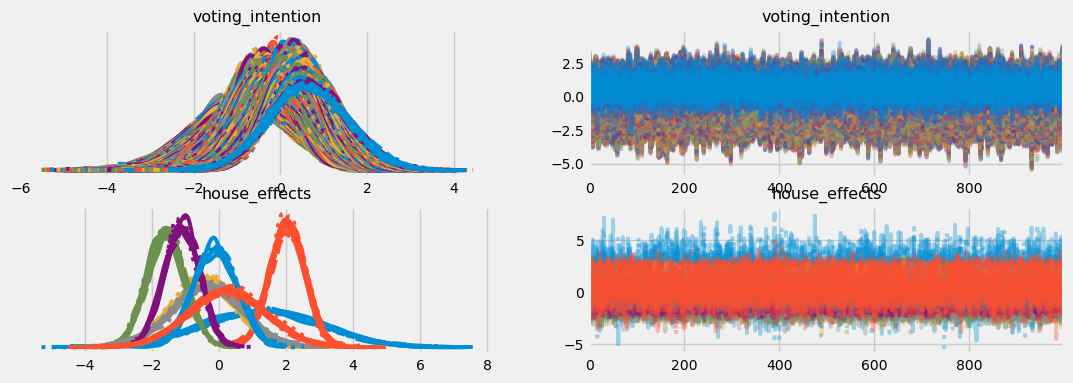

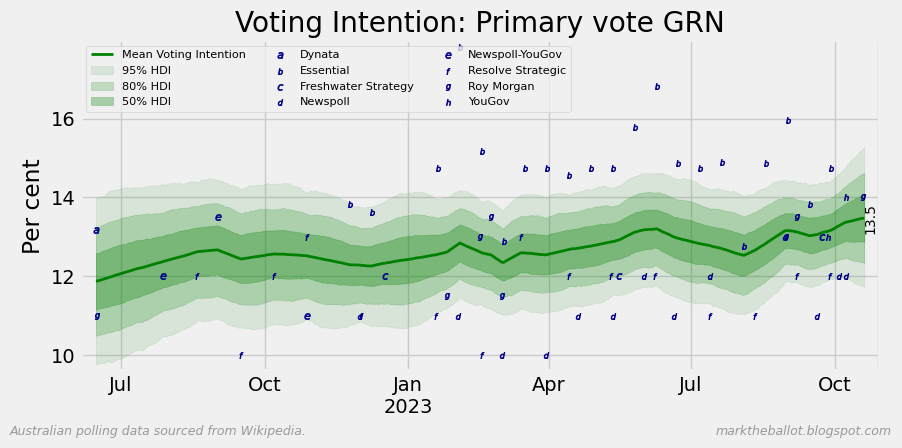

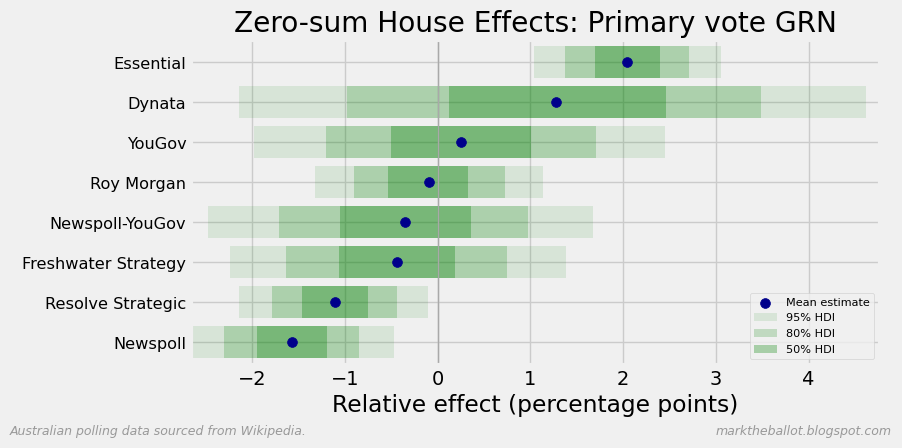

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (10 chains in 10 jobs)
NUTS: [voting_intention, house_effects]


Sampling 10 chains for 1_000 tune and 1_000 draw iterations (10_000 + 10_000 draws total) took 47 seconds.


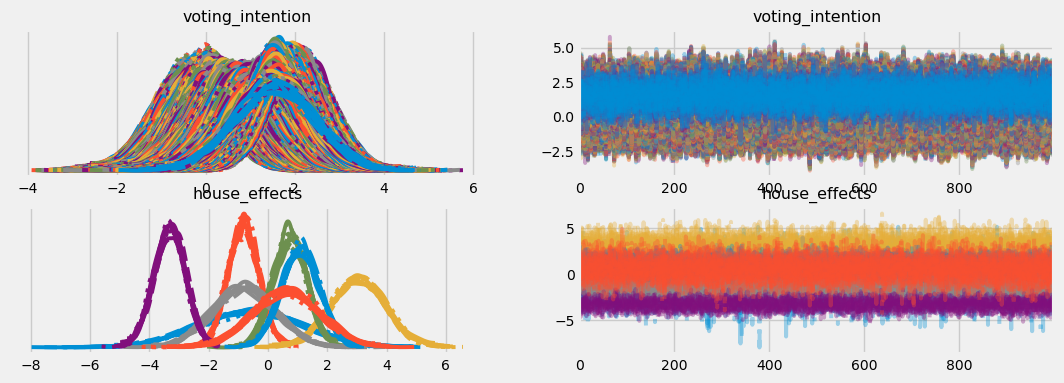

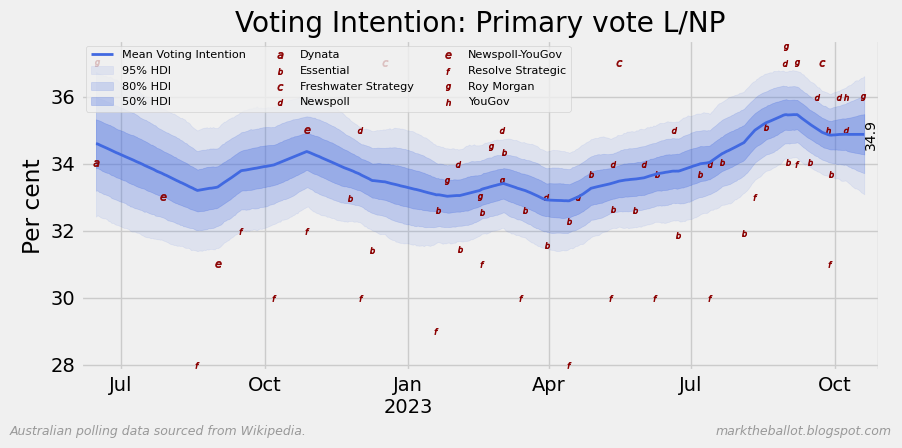

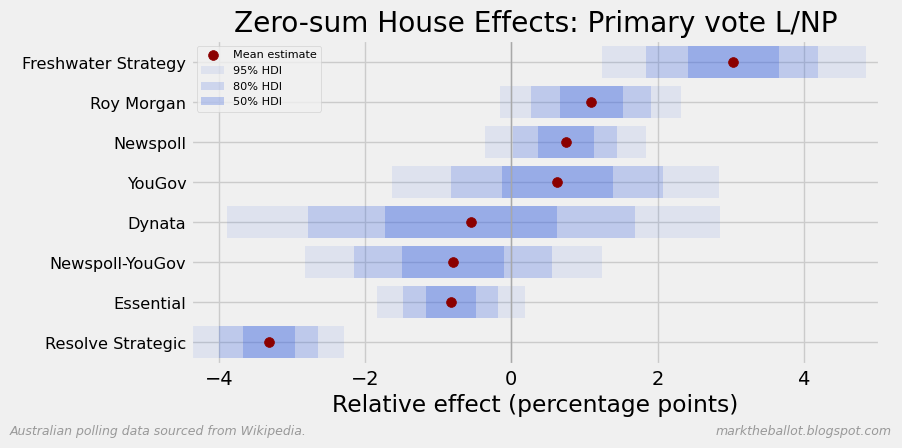

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (10 chains in 10 jobs)
NUTS: [voting_intention, house_effects]


Sampling 10 chains for 1_000 tune and 1_000 draw iterations (10_000 + 10_000 draws total) took 47 seconds.


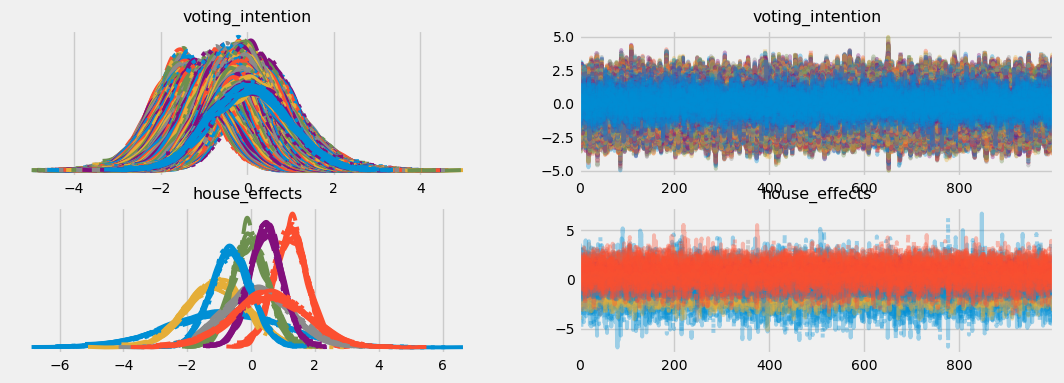

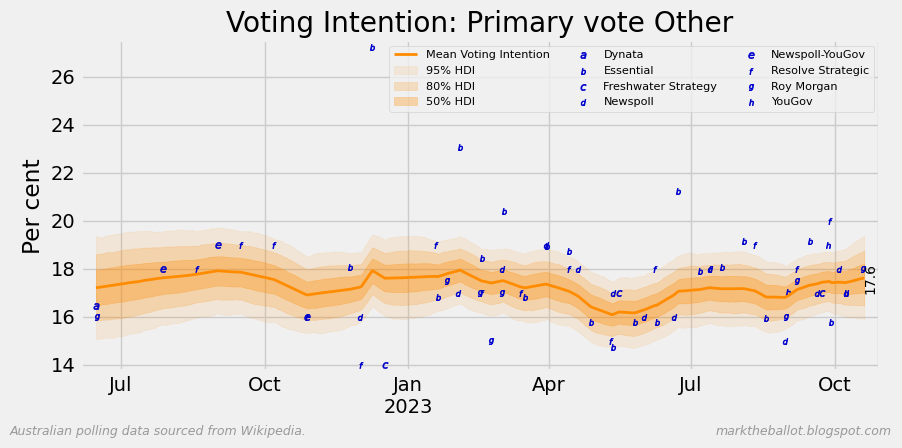

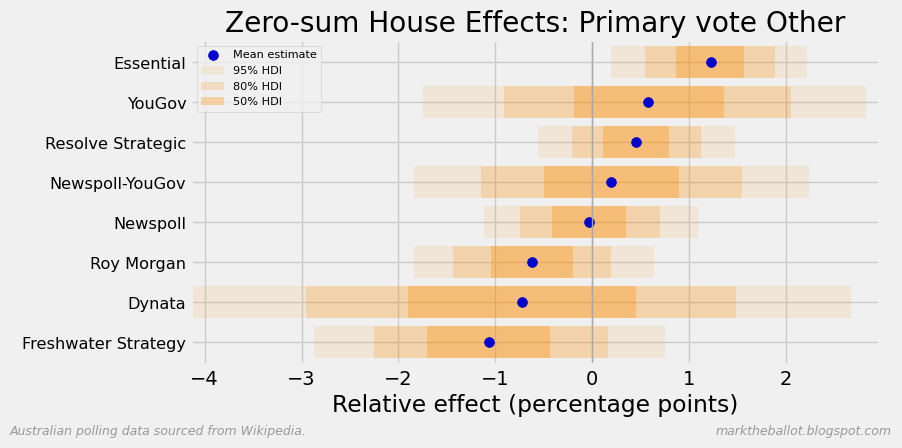

In [7]:
for column in chart:
    # Construct and run the model ...
    inputs: dict[str, Any] = bayes_tools.prepare_data_for_analysis(df, column)
    model: pm.Model = bayes_tools.define_model(inputs)
    generate_model_map(model, column)
    trace = bayes_tools.draw_samples(model)

    # plot the results
    line_color = plotting.get_color(column)
    point_color = plotting.contrast(line_color)
    bayes_tools.plot_aggregation(
        inputs,
        trace,
        line_color=line_color,
        point_color=point_color,
        show=SHOW,
    )
    bayes_tools.plot_house_effects(
        inputs,
        trace,
        line_color=line_color,
        point_color=point_color,
        title=f"Zero-sum House Effects: {column}",
        show=SHOW,
    )

## Finished

In [8]:
%load_ext watermark
%watermark -u -n -t -v -iv -w

Last updated: Sun Oct 29 2023 15:51:50

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.16.1

matplotlib: 3.8.0
pymc      : 5.9.1
pandas    : 2.1.2

Watermark: 2.4.3



In [9]:
print("Finished")

Finished
